In [1]:
import pandas as pd
import numpy as np

## 난수 발생을 위한 패키지
import random
## 그래프 표현을 위해 필요한 패키지
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum

# 폰트 캐시 재설정
!sudo fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 평균 컬럼 추가).csv', encoding='cp949')
df.set_index('동', drop=True, inplace=True)
df.head()

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898


In [5]:
df_multi = df.loc[df['Type_OneHot_Encoder_연립다세대']==1]
df_multi.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_multi

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1902.358898
원효로2가,2.0,13.940659,20.914235,4.0,20200501.0,2020,5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3063.152699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,35.0,22.724690,19.539600,3.0,20221219.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1068.249258
번동,10.0,22.724690,19.539600,4.0,20221223.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3704.392560
번동,33.0,22.724690,19.539600,2.0,20221225.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,709.459459


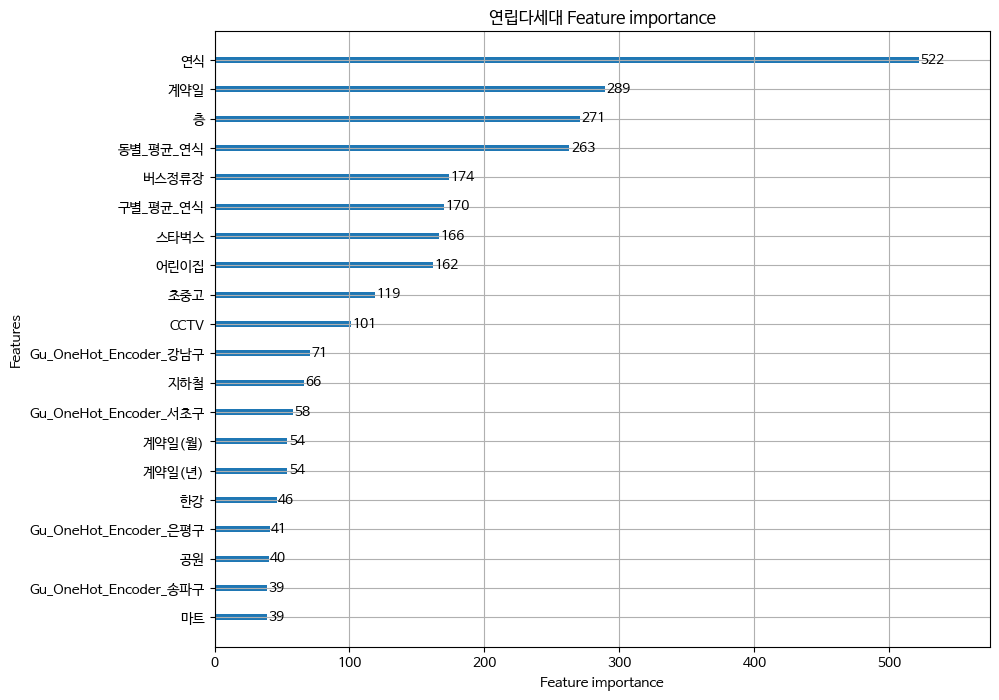

In [6]:
# 연립다세대
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df_multi.iloc[:, :-1]
y_label = df_multi.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20, title='연립다세대 Feature importance')
plt.show()

Mean Absolute Error: 407.86719018070755
Mean Squared Error: 352139.21250331786
Root Mean Squared Error: 593.4131886833304
Mean Squared Log Error: 0.1165942880903794
R Squared: 0.6480165514286106
Mean Absolute Percentage Error: 28.661476098477518
Mean Percentage Error: -13.598447790534104
              실제값          예측값
동                             
가락동   2140.711978  2126.307295
가리봉동  1959.022764  2020.964491
가산동   2440.507577  2379.802529
가양동   2215.356057  2203.599287
가회동   2021.248554  1443.749885
...           ...          ...
효자동   2135.148060  2340.961809
효창동   2406.788171  2349.459695
후암동   2073.275678  2055.556853
휘경동   2097.681246  1963.756330
흑석동   1708.213587  1819.395816

[330 rows x 2 columns]


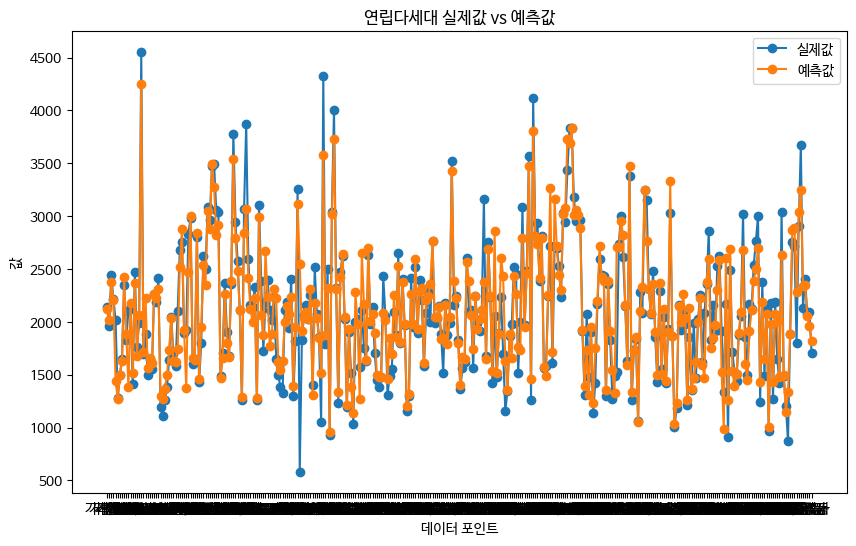

In [7]:
# 연립다세대
# LightGBM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('연립다세대 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

In [8]:
# # 연립다세대
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 2

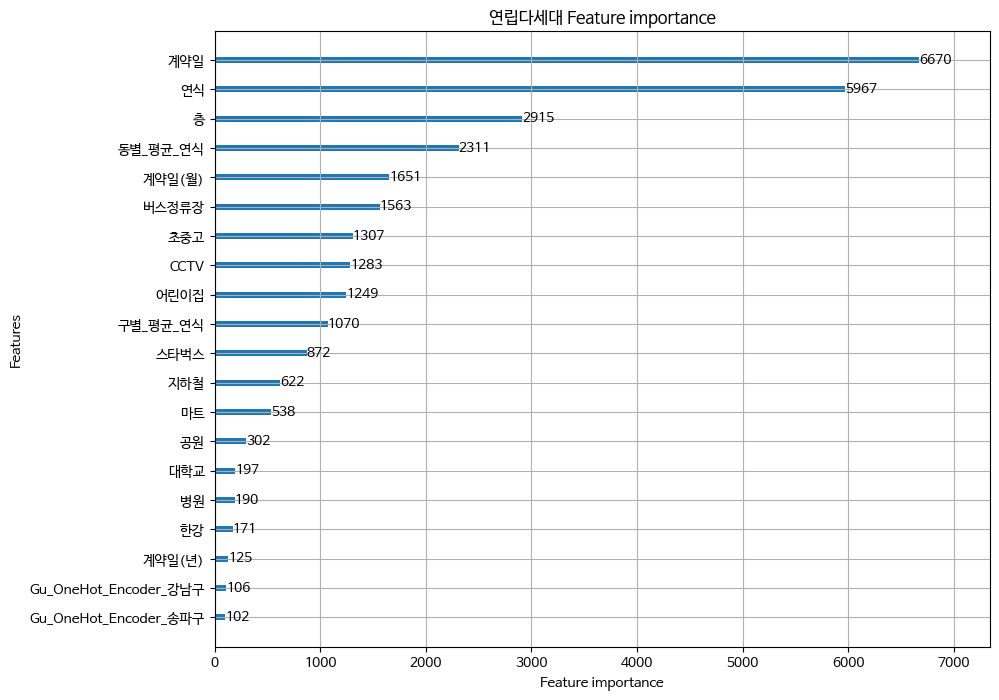

In [9]:
# 연립다세대
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20, title='연립다세대 Feature importance')
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 387.92577123891454
Mean Squared Error: 320135.96290803415
Root Mean Squared Error: 565.8055875546248
Mean Squared Log Error: 0.10711323090317769
R Squared: 0.6800056448270992
Mean Absolute Percentage Error: 27.014409961814962
Mean Percentage Error: -12.141825971941868
              실제값          예측값
동                             
가락동   2140.711978  2111.278963
가리봉동  1959.022764  1918.814405
가산동   2440.507577  2390.199175
가양동   2215.356057  2154.722161
가회동   2021.248554  1968.561865
...           ...          ...
효자동   2135.148060  2366.868289
효창동   2406.788171  2419.548149
후암동   2073.275678  2065.769182
휘경동   2097.681246  2049.339151
흑석동  

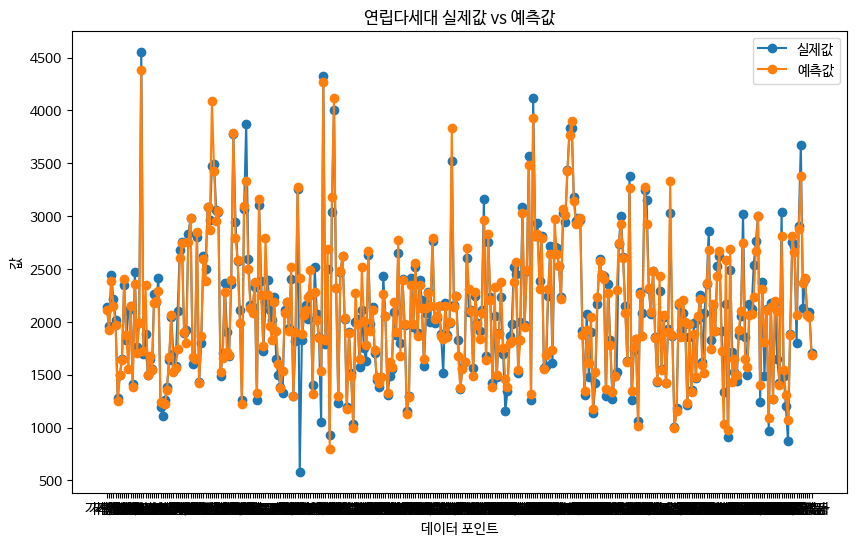

In [10]:
# 연립다세대
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('연립다세대 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

In [11]:
compare_df
compare_df.loc[abs(compare_df['실제값']-compare_df['예측값']) == max(abs(compare_df['실제값']-compare_df['예측값']))]

,실제값,예측값
동,,
만리동2가,582.938475,2416.864574


In [12]:
df.loc['만리동2가']

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
만리동2가,16.0,5.050553,16.478287,12.0,20200409.0,2020,4,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2061.211743
만리동2가,16.0,5.050553,16.478287,10.0,20200730.0,2020,7,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2023.564698
만리동2가,16.0,5.050553,16.478287,13.0,20200730.0,2020,7,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1920.504111
만리동2가,15.0,5.050553,16.478287,6.0,20191125.0,2019,11,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1985.858282
만리동2가,15.0,5.050553,16.478287,15.0,20191226.0,2019,12,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1961.035053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
만리동2가,5.0,5.050553,16.478287,9.0,20221217.0,2022,12,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8555.297120
만리동2가,7.0,5.050553,16.478287,4.0,20221221.0,2022,12,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,602.993742
만리동2가,5.0,5.050553,16.478287,4.0,20221228.0,2022,12,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3768.775503


In [13]:
df_log = pd.read_csv("/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(로그변환).csv", encoding='cp949')
df_log.set_index('동', drop=True, inplace=True)
df_log.head(3)

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,로그전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.620045
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.242673
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.006028


In [14]:
df_multi = df_log.loc[df['Type_OneHot_Encoder_연립다세대']==1]
df_multi.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_multi

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,로그전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.242673
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.006028
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.016998
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.551375
원효로2가,2.0,13.940659,20.914235,4.0,20200501.0,2020,5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.027526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,35.0,22.724690,19.539600,3.0,20221219.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.974712
번동,10.0,22.724690,19.539600,4.0,20221223.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.217544
번동,33.0,22.724690,19.539600,2.0,20221225.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.565912


In [15]:
# lightgbm 학습
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features_log = df_multi.iloc[:, :-1]
y_label_log = df_multi.iloc[:, -1]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_features_log, y_label_log, test_size=0.2, random_state=156)

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 2

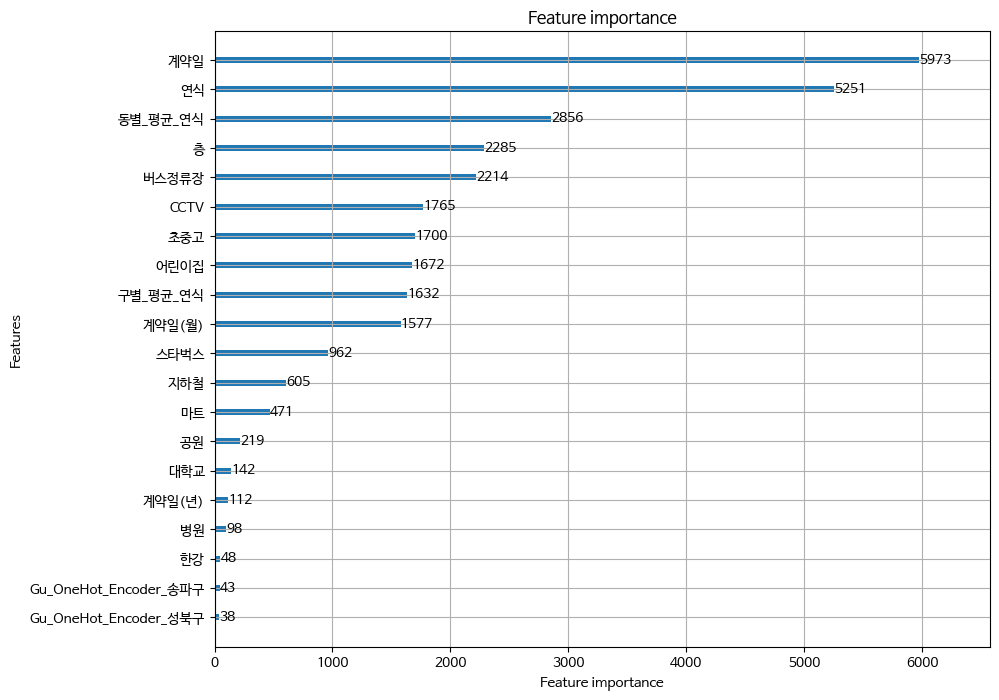

In [16]:
# 최적화된 하이퍼파라미터 적용
model_best = LGBMRegressor(subsample=0.6,
                          n_estimators=1000,
                          max_depth=20,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          random_state=11)
model_best.fit(X_train_log, y_train_log)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20)
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 399.43892699583836
Mean Squared Error: 339210.666246747
Root Mean Squared Error: 582.4179480808838
Mean Squared Log Error: 0.10521690351789931
R Squared: 0.6609393789207623
Mean Absolute Percentage Error: 26.05564811760614
Mean Percentage Error: -7.219696962182271
              실제값          예측값
동                             
가락동   2140.711978  2012.285634
가리봉동  1959.022764  1788.908268
가산동   2440.507577  2240.679566
가양동   2215.356057  2116.481112
가회동   2021.248554  1592.945123
...           ...          ...
효자동   2135.148060  2402.924781
효창동   2406.788171  2381.019099
후암동   2073.275678  2014.359430
휘경동   2097.681246  1942.156251
흑석동   170

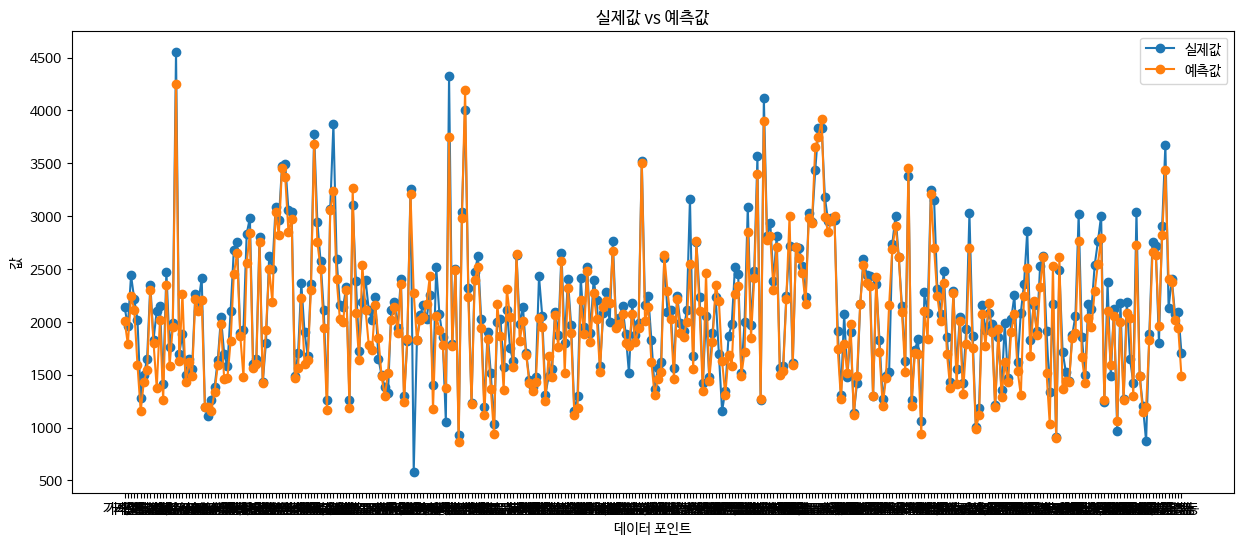

In [17]:
# 학습된 모델을 사용하여 예측
y_pred_log = model_best.predict(X_test_log)
y_pred = np.expm1(y_pred_log)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(15, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()